# Project 2 - Ames Housing Data and Kaggle (Modelling)

## Problem Statement

Using the selected features to build an optimum model that can predict the sale price of homes in Ames, Iowa in helping real estate agents to have a good prediction of the sale price of a house.

## Executive Summary

### Contents:
- [Data Import from Feature Selection Data](#Data-Import-from-Feature-Selection-Data)
- [Data Cleaning](#Data-Cleaning)
- [Model preparations](#Model-preparations)
- [Model Fit and Evaluation](#Model-Fit-and-Evaluation)
- [Conclusion and Recommendation](#Conclusion-and-Recommendation)
- [Submission for Sale Price prediction](#Submission-for-Sale-Price-prediction)

In [1]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pd.set_option('display.max_rows',5000)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

## Data Import from Feature Selection Data

In [2]:
train_features_df = pd.read_csv('datasets/train_features_df.csv')
test_features_df = pd.read_csv('datasets/test_features_df.csv')
test_df = pd.read_csv('datasets/test.csv')

## Data Cleaning

In [3]:
train_features_df.head() #checking the train data, there is an additional Unnamed: 0 column

,Unnamed: 0,saleprice,overallqual,totalsqft,garagecars,garagearea,totalbath,totrmsabvgrd,masvnrarea,agesold,fireplaces,mssubclass_30,mssubclass_40,mssubclass_45,mssubclass_50,mssubclass_60,mssubclass_70,mssubclass_75,mssubclass_80,mssubclass_85,mssubclass_90,mssubclass_120,mssubclass_150,mssubclass_160,mssubclass_180,mssubclass_190,mszoning_C (all),mszoning_FV,mszoning_I (all),mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,landcontour_HLS,landcontour_Low,landcontour_Lvl,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,roofmatl_Membran,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,extercond_Fa,extercond_Gd,extercond_Po,extercond_TA,bsmtqual_Fa,bsmtqual_Gd,bsmtqual_NA,bsmtqual_Po,bsmtqual_TA,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_NA,bsmtexposure_No,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heatingqc_Fa,heatingqc_Gd,heatingqc_Po,heatingqc_TA,centralair_Y,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,fireplacequ_Fa,fireplacequ_Gd,fireplacequ_NA,fireplacequ_Po,fireplacequ_TA,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_NA,garagefinish_NA,garagefinish_RFn,garagefinish_Unf,garagequal_Fa,garagequal_Gd,garagequal_NA,garagequal_Po,garagequal_TA,garagecond_Fa,garagecond_Gd,garagecond_NA,garagecond_Po,garagecond_TA,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD
0,0,130500,6,2204.0,2.0,475.0,2.5,6,289.0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1,220000,7,3035.0,2.0,559.0,2.5,8,132.0,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
2,2,109000,5,2114.0,1.0,246.0,1.0,5,0.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,3,174000,5,1828.0,2.0,400.0,2.5,7,0.0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [4]:
train_features_df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
train_features_df.head() #check if it column was dropped

,saleprice,overallqual,totalsqft,garagecars,garagearea,totalbath,totrmsabvgrd,masvnrarea,agesold,fireplaces,mssubclass_30,mssubclass_40,mssubclass_45,mssubclass_50,mssubclass_60,mssubclass_70,mssubclass_75,mssubclass_80,mssubclass_85,mssubclass_90,mssubclass_120,mssubclass_150,mssubclass_160,mssubclass_180,mssubclass_190,mszoning_C (all),mszoning_FV,mszoning_I (all),mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,landcontour_HLS,landcontour_Low,landcontour_Lvl,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,roofmatl_Membran,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,extercond_Fa,extercond_Gd,extercond_Po,extercond_TA,bsmtqual_Fa,bsmtqual_Gd,bsmtqual_NA,bsmtqual_Po,bsmtqual_TA,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_NA,bsmtexposure_No,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heatingqc_Fa,heatingqc_Gd,heatingqc_Po,heatingqc_TA,centralair_Y,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,fireplacequ_Fa,fireplacequ_Gd,fireplacequ_NA,fireplacequ_Po,fireplacequ_TA,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_NA,garagefinish_NA,garagefinish_RFn,garagefinish_Unf,garagequal_Fa,garagequal_Gd,garagequal_NA,garagequal_Po,garagequal_TA,garagecond_Fa,garagecond_Gd,garagecond_NA,garagecond_Po,garagecond_TA,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD
0,130500,6,2204.0,2.0,475.0,2.5,6,289.0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
1,220000,7,3035.0,2.0,559.0,2.5,8,132.0,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
2,109000,5,2114.0,1.0,246.0,1.0,5,0.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,174000,5,1828.0,2.0,400.0,2.5,7,0.0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,

In [6]:
test_features_df.head() #checking the test data, there is an additional Unnamed: 0 column

,Unnamed: 0,overallqual,totalsqft,garagecars,garagearea,totalbath,totrmsabvgrd,masvnrarea,agesold,fireplaces,mssubclass_30,mssubclass_40,mssubclass_45,mssubclass_50,mssubclass_60,mssubclass_70,mssubclass_75,mssubclass_80,mssubclass_85,mssubclass_90,mssubclass_120,mssubclass_150,mssubclass_160,mssubclass_180,mssubclass_190,mszoning_C (all),mszoning_FV,mszoning_I (all),mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,landcontour_HLS,landcontour_Low,landcontour_Lvl,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,roofmatl_Membran,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,extercond_Fa,extercond_Gd,extercond_Po,extercond_TA,bsmtqual_Fa,bsmtqual_Gd,bsmtqual_NA,bsmtqual_Po,bsmtqual_TA,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_NA,bsmtexposure_No,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heatingqc_Fa,heatingqc_Gd,heatingqc_Po,heatingqc_TA,centralair_Y,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,fireplacequ_Fa,fireplacequ_Gd,fireplacequ_NA,fireplacequ_Po,fireplacequ_TA,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_NA,garagefinish_NA,garagefinish_RFn,garagefinish_Unf,garagequal_Fa,garagequal_Gd,garagequal_NA,garagequal_Po,garagequal_TA,garagecond_Fa,garagecond_Gd,garagecond_NA,garagecond_Po,garagecond_TA,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD
0,0,6,2948,1,440,2.0,9,0.0,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,5,3934,2,580,2.0,10,0.0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
2,2,7,2150,2,426,2.5,7,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,3,5,1936,2,480,1.0,5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0

In [7]:
test_features_df.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
test_features_df.head() #check if it column was dropped

,overallqual,totalsqft,garagecars,garagearea,totalbath,totrmsabvgrd,masvnrarea,agesold,fireplaces,mssubclass_30,mssubclass_40,mssubclass_45,mssubclass_50,mssubclass_60,mssubclass_70,mssubclass_75,mssubclass_80,mssubclass_85,mssubclass_90,mssubclass_120,mssubclass_150,mssubclass_160,mssubclass_180,mssubclass_190,mszoning_C (all),mszoning_FV,mszoning_I (all),mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,landcontour_HLS,landcontour_Low,landcontour_Lvl,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,roofmatl_Membran,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,extercond_Fa,extercond_Gd,extercond_Po,extercond_TA,bsmtqual_Fa,bsmtqual_Gd,bsmtqual_NA,bsmtqual_Po,bsmtqual_TA,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_NA,bsmtexposure_No,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heatingqc_Fa,heatingqc_Gd,heatingqc_Po,heatingqc_TA,centralair_Y,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,fireplacequ_Fa,fireplacequ_Gd,fireplacequ_NA,fireplacequ_Po,fireplacequ_TA,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_NA,garagefinish_NA,garagefinish_RFn,garagefinish_Unf,garagequal_Fa,garagequal_Gd,garagequal_NA,garagequal_Po,garagequal_TA,garagecond_Fa,garagecond_Gd,garagecond_NA,garagecond_Po,garagecond_TA,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD
0,6,2948,1,440,2.0,9,0.0,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,5,3934,2,580,2.0,10,0.0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
2,7,2150,2,426,2.5,7,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,5,1936,2,480,1.0,5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,

## Model preparations

In [9]:
# Define X variations and target y
X = train_features_df[[x for x in train_features_df.columns if x != 'saleprice']]
y = train_features_df['saleprice']

In [10]:
X.head()

,overallqual,totalsqft,garagecars,garagearea,totalbath,totrmsabvgrd,masvnrarea,agesold,fireplaces,mssubclass_30,mssubclass_40,mssubclass_45,mssubclass_50,mssubclass_60,mssubclass_70,mssubclass_75,mssubclass_80,mssubclass_85,mssubclass_90,mssubclass_120,mssubclass_150,mssubclass_160,mssubclass_180,mssubclass_190,mszoning_C (all),mszoning_FV,mszoning_I (all),mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,landcontour_HLS,landcontour_Low,landcontour_Lvl,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,roofmatl_Membran,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,extercond_Fa,extercond_Gd,extercond_Po,extercond_TA,bsmtqual_Fa,bsmtqual_Gd,bsmtqual_NA,bsmtqual_Po,bsmtqual_TA,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_NA,bsmtexposure_No,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heatingqc_Fa,heatingqc_Gd,heatingqc_Po,heatingqc_TA,centralair_Y,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,fireplacequ_Fa,fireplacequ_Gd,fireplacequ_NA,fireplacequ_Po,fireplacequ_TA,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_NA,garagefinish_NA,garagefinish_RFn,garagefinish_Unf,garagequal_Fa,garagequal_Gd,garagequal_NA,garagequal_Po,garagequal_TA,garagecond_Fa,garagecond_Gd,garagecond_NA,garagecond_Po,garagecond_TA,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD
0,6,2204.0,2.0,475.0,2.5,6,289.0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
1,7,3035.0,2.0,559.0,2.5,8,132.0,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
2,5,2114.0,1.0,246.0,1.0,5,0.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,5,1828.0,2.0,400.0,2.5,7,0.0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,

In [11]:
y.tail()

2044    298751
2045     82500
2046    177000
2047    144000
2048    189000
Name: saleprice, dtype: int64

In [12]:
import statsmodels.api as sm

In [13]:
#null hypothesis = the coeff are not reliable predictors
#alternative hypothesis = the coeff are reliable predictors

#results = sm.OLS(y, X).fit()
#results.summary()

results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              saleprice   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              889.2
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                        0.00
Time:                        18:00:29   Log-Likelihood:                         -23436.
No. Observations:                2049   AIC:                                  4.720e+04
Df Residuals:                    1886   BIC:                                  4.811e+04
Df Model:                         163                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
overallqual           7539.3382    785.832      9.594      0.000    5998.146    9080.530
totalsqft               36.8535      1.666     22.120      0.000      33.586      40.121
garagecars            1601.5773   1914.005      0.837      0.403   -2152.213    5355.368
garagearea              30.5684      6.524      4.685      0.000      17.773      43.364
totalbath             2832.4301   1628.205      1.740      0.082    -360.843    6025.703
totrmsabvgrd          -663.0661    640.338     -1.035      0.301   -1918.912     592.780
masvnrarea              28.7268      3.997      7.188      0.000      20.889      36.565
agesold               -237.7860     42.429     -5.604      0.000    -320.999    -154.573
fireplaces            1.103e+04   2154.314      5.119      0.000    6803.523    1.53e+04
mssubclass_30        -2564.2832   3392.385     -0.756      0.450   -9217.505    4088.939
mssubclass_40        -5903.8027   1.23e+04     -0.480      0.631      -3e+04    1.82e+04
mssubclass_45         6725.3864   7750.685      0.868      0.386   -8475.432    2.19e+04
mssubclass_50        -1749.8896   2674.809     -0.654      0.513   -6995.786    3496.007
mssubclass_60         6975.4748   2143.310      3.255      0.001    2771.967    1.12e+04
mssubclass_70         2512.0853   3634.240      0.691      0.490   -4615.468    9639.638
mssubclass_75         4719.7955   7157.157      0.659      0.510   -9316.983    1.88e+04
mssubclass_80          738.2447   3083.143      0.239      0.811   -5308.485    6784.975
mssubclass_85         3696.0989   5135.227      0.720      0.472   -6375.224    1.38e+04
mssubclass_90        -2.396e+04   3767.210     -6.361      0.000   -3.14e+04   -1.66e+04
mssubclass_120       -2.478e+04   3115.312     -7.953      0.000   -3.09e+04   -1.87e+04
mssubclass_150       -5.571e+04   2.61e+04     -2.132      0.033   -1.07e+05   -4464.337
mssubclass_160       -2.682e+04   4488.771     -5.976      0.000   -3.56e+04    -1.8e+04
mssubclass_180       -1.826e+04   9044.551     -2.019      0.044    -3.6e+04    -524.675
mssubclass_190       -6490.2151   4321.063     -1.502      0.133    -1.5e+04    1984.351
mszoning_C (all)      3.041e+04   2.23e+04      1.362      0.173   -1.34e+04    7.42e+04
mszoning_FV           5.203e+04   2.19e+04      2.374      0.018    9050.924     9.5e+04
mszoning_I (all)      4.172e+04   3.24e+04      1.290      0.197   -2.17e+04    1.05e+05
mszoning_RH           5.081e+04   2.25e+04      2.258      0.024    6670.898    9.49e+04
mszoning_RL           4.257e+04   2.13e+04      1.996      0.046     745.607    8.44e+04
mszoning_RM           3.792e+04   2.17e+04      1.746      0.081   -4675.730    8.05e+04
street_Pave           -300.6265   1.03e+04     

According to the OLS summary to give an estimation of how my parameters would perform, the prob (F-statistic) is less than 0.01 which shows that at least one of the features predicts target y. When we drill down to see individually each feature, the P-value of many of the features are less than 0.05, which are means they are likely to predict y, although there are also features that have a high value and means it's confidence level might be low. We can model a few models to see how they perform with these features, and even look at lasso regression which might eliminate some of these features.

In [14]:
#From train_features_df
#X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
#should I do train test split or cross validation?
#If I do a cross val, I don't need to do train test split and fit my model into my whole train data.

#### Standard Scalar

In [15]:
ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)

In [16]:
#for the sake of 1st submission, scale the test data as well.
test_features_scaled = ss.transform(test_features_df)

#### Istantiate the models

In [17]:
lr = LinearRegression()
ridgecv = RidgeCV(alphas = np.linspace(0.1,10,100))
lassocv = LassoCV(n_alphas = 100)

## Model Fit and Evaluation

#### Fitting

In [18]:
# Fit Model 1 Linear regression
lr.fit(X_scaled,y)

LinearRegression()

In [19]:
# Fit model 2 ridge (regularization)
ridgecv.fit(X_scaled,y)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [20]:
#Fit model 3 lasso (regularization)
lassocv.fit(X_scaled, y)

LassoCV()

In [21]:
#should I create baseline model as well using dummyregressor?

In [22]:
#from sklearn.dummy import DummyRegressor
#dum = DummyRegressor()

In [23]:
#baseline model
#dum = dum.fit(X_train_scaled, y_train)
#y_predict = dum.predict(X_test_scaled)
#print (f' dum score:{(dum.score(X_test_scaled, y_test))}')
#print (f' dum rmse: {(np.sqrt(metrics.mean_squared_error(y_test, y_predict)))}')

#decided not to use the baseline model, as it does not give much insight

#### Evaluation and scoring of models

In [24]:
def cv_score(model,X,y):
    return cross_val_score(model,X,y,cv=5).mean()

In [25]:
def cv_rmse(model,X,y):
    return np.sqrt(-cross_val_score(model,X,y,cv=5,scoring='neg_mean_squared_error').mean())

In [26]:
def rmse(model,X,y):
    return np.sqrt(mean_squared_error(y,model.predict(X)))

##### Linear Regression

In [27]:
#Model 1 Linear Regression
lr_score = lr.score(X_scaled,y)

In [28]:
lr_cv_score = cv_score(lr,X_scaled,y)

In [29]:
print(f'Training R2(lr): {lr_score}')
print(f'Estimate of Test R2(lr): {lr_cv_score}')

Training R2(lr): 0.9198391786427024
Estimate of Test R2(lr): -7.251104822414801e+22


In [30]:
lr_rmse = rmse(lr,X_scaled,y)

In [31]:
lr_cv_rmse = cv_rmse(lr,X_scaled,y)

In [32]:
print(f'Training rmse(lr): {lr_rmse}')
print(f'Estimate of Test rmse(lr): {lr_cv_rmse}')

Training rmse(lr): 22445.32413457006
Estimate of Test rmse(lr): 2.0884682553729964e+16


In [33]:
#{X.columns[i]: lr.coef_[i] for i in range(len(X.columns))}

From the evaluation of LR model, it shows that it is probably not a good model for prediction of target y(saleprice). The estimated test score is negative which implies that it probable would give a extremely inaccurate estimate of the saleprice. It is negative in accuracy compared to the base model(y minus mean of y). The accuracy for the training is high, which could mean that it might be overfitted, and can't generalize enough to predict y, this is a high variance model.

The root mean squared error is extremely low for the estimation of the test data. This is not a good gauge as the accuracy we have seen is negative.

In [34]:
#done for the sake of submission_1(test-run on kaggle)
y_predict = lr.predict(test_features_scaled) 

In [35]:
submission_1 = pd.DataFrame(y_predict, columns=['Saleprice'])
submission_1['Id'] = test_df['Id']
submission_1 = submission_1[['Id','Saleprice']]
submission_1.head()

,Id,Saleprice
0,2658,93661.886491
1,2718,208444.827927
2,2414,186262.515495
3,1989,234982.827927
4,625,183022.827927


In [36]:
submission_1['Saleprice'][:10]
#Initial submission_1 was all negative because did not reindex column so they were not in order.
#Corrected this error.

0     93661.886491
1    208444.827927
2    186262.515495
3    234982.827927
4    183022.827927
5    109050.827927
6    107746.827927
7    153128.827927
8    202710.827927
9    167700.827927
Name: Saleprice, dtype: float64

In [37]:
submission_1.to_csv('datasets/submission1.csv',index=False)

##### Ridge

In [38]:
ridgecv.alpha_ #optimal alpha

10.0

In [39]:
ridge = Ridge(alpha=10) #using the ridgecv to find the optimum alpha

In [40]:
ridge.fit(X_scaled,y)

Ridge(alpha=10)

In [41]:
ridge_score = ridge.score(X_scaled, y)

In [42]:
ridge_cv_score = cv_score(ridge,X_scaled,y)

In [43]:
print(f'Training R2(ridge): {ridge_score}')
print(f'Estimate of Test R2(ridge): {ridge_cv_score}')

Training R2(ridge): 0.9192712321314029
Estimate of Test R2(ridge): 0.8984620174922133


In [44]:
ridge_rmse = rmse(ridge, X_scaled, y)

In [45]:
ridge_cv_rmse = cv_rmse(ridge,X_scaled,y)

In [46]:
print(f'Training rmse(ridge): {ridge_rmse}')
print(f'Estimate of Test rmse(ridge): {ridge_cv_rmse}')

Training rmse(ridge): 22524.697344800818
Estimate of Test rmse(ridge): 25255.187552782136


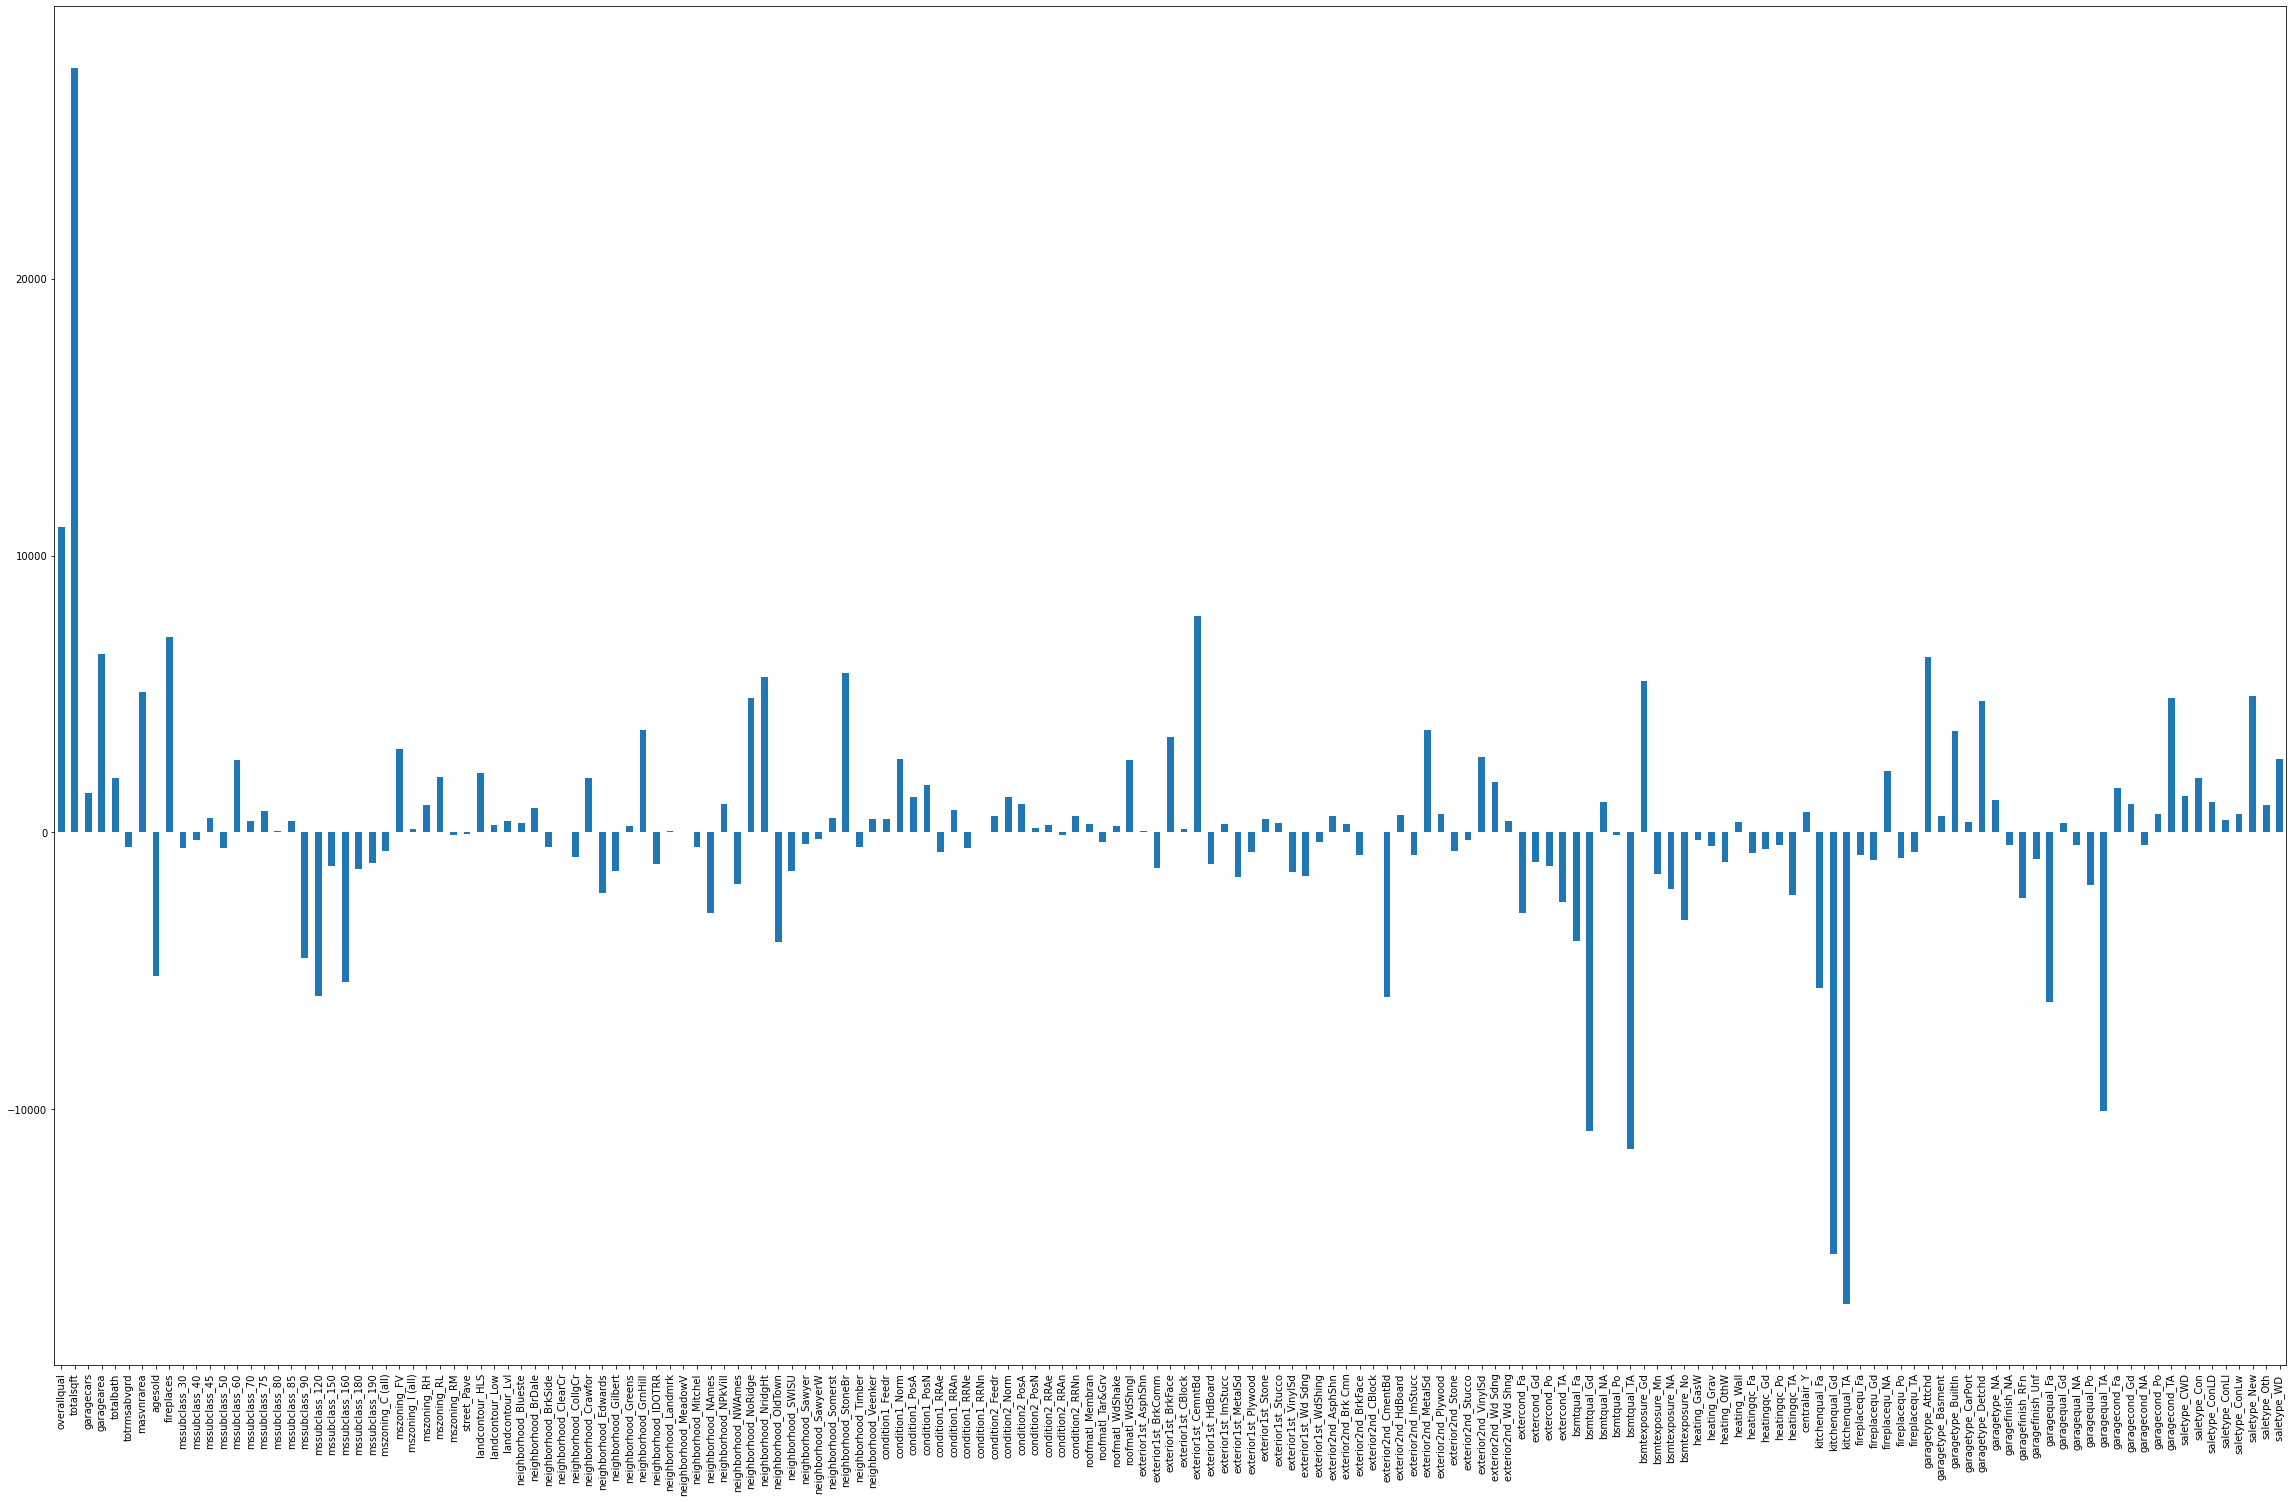

In [47]:
pd.Series(ridge.coef_, index=X.columns).plot.bar(figsize=(40,25));  

In [48]:
#ridge_coef = {}
#for x in X.columns:
#    for i in ridge.coef_:
#        coef = {x:i}

The coefficients are the parameters for the models, each coefficient is the effect of sale price for every unit feature.

##### Lasso

In [49]:
lassocv.alpha_

325.83575061430054

In [50]:
lasso = Lasso(alpha=325.84)

In [51]:
lasso.fit(X_scaled,y)

Lasso(alpha=325.84)

In [52]:
lasso_score = lasso.score(X_scaled, y)

In [53]:
lasso_cv_score = cv_score(lasso, X_scaled, y)

In [54]:
print(f'Training R2(lasso): {lasso_score}')
print(f'Estimate of Test R2(lasso): {lasso_cv_score}')

Training R2(lasso): 0.9151881616597448
Estimate of Test R2(lasso): 0.9015355355892026


In [55]:
lasso_rmse = rmse(lasso, X_scaled, y)

In [56]:
lasso_cv_rmse = cv_rmse(lasso, X_scaled, y)

In [57]:
print(f'Training rmse(lasso): {lasso_rmse}')
print(f'Estimate of Test rmse(lasso): {lasso_cv_rmse}')

Training rmse(lasso): 23087.29438523478
Estimate of Test rmse(lasso): 24886.470306227988


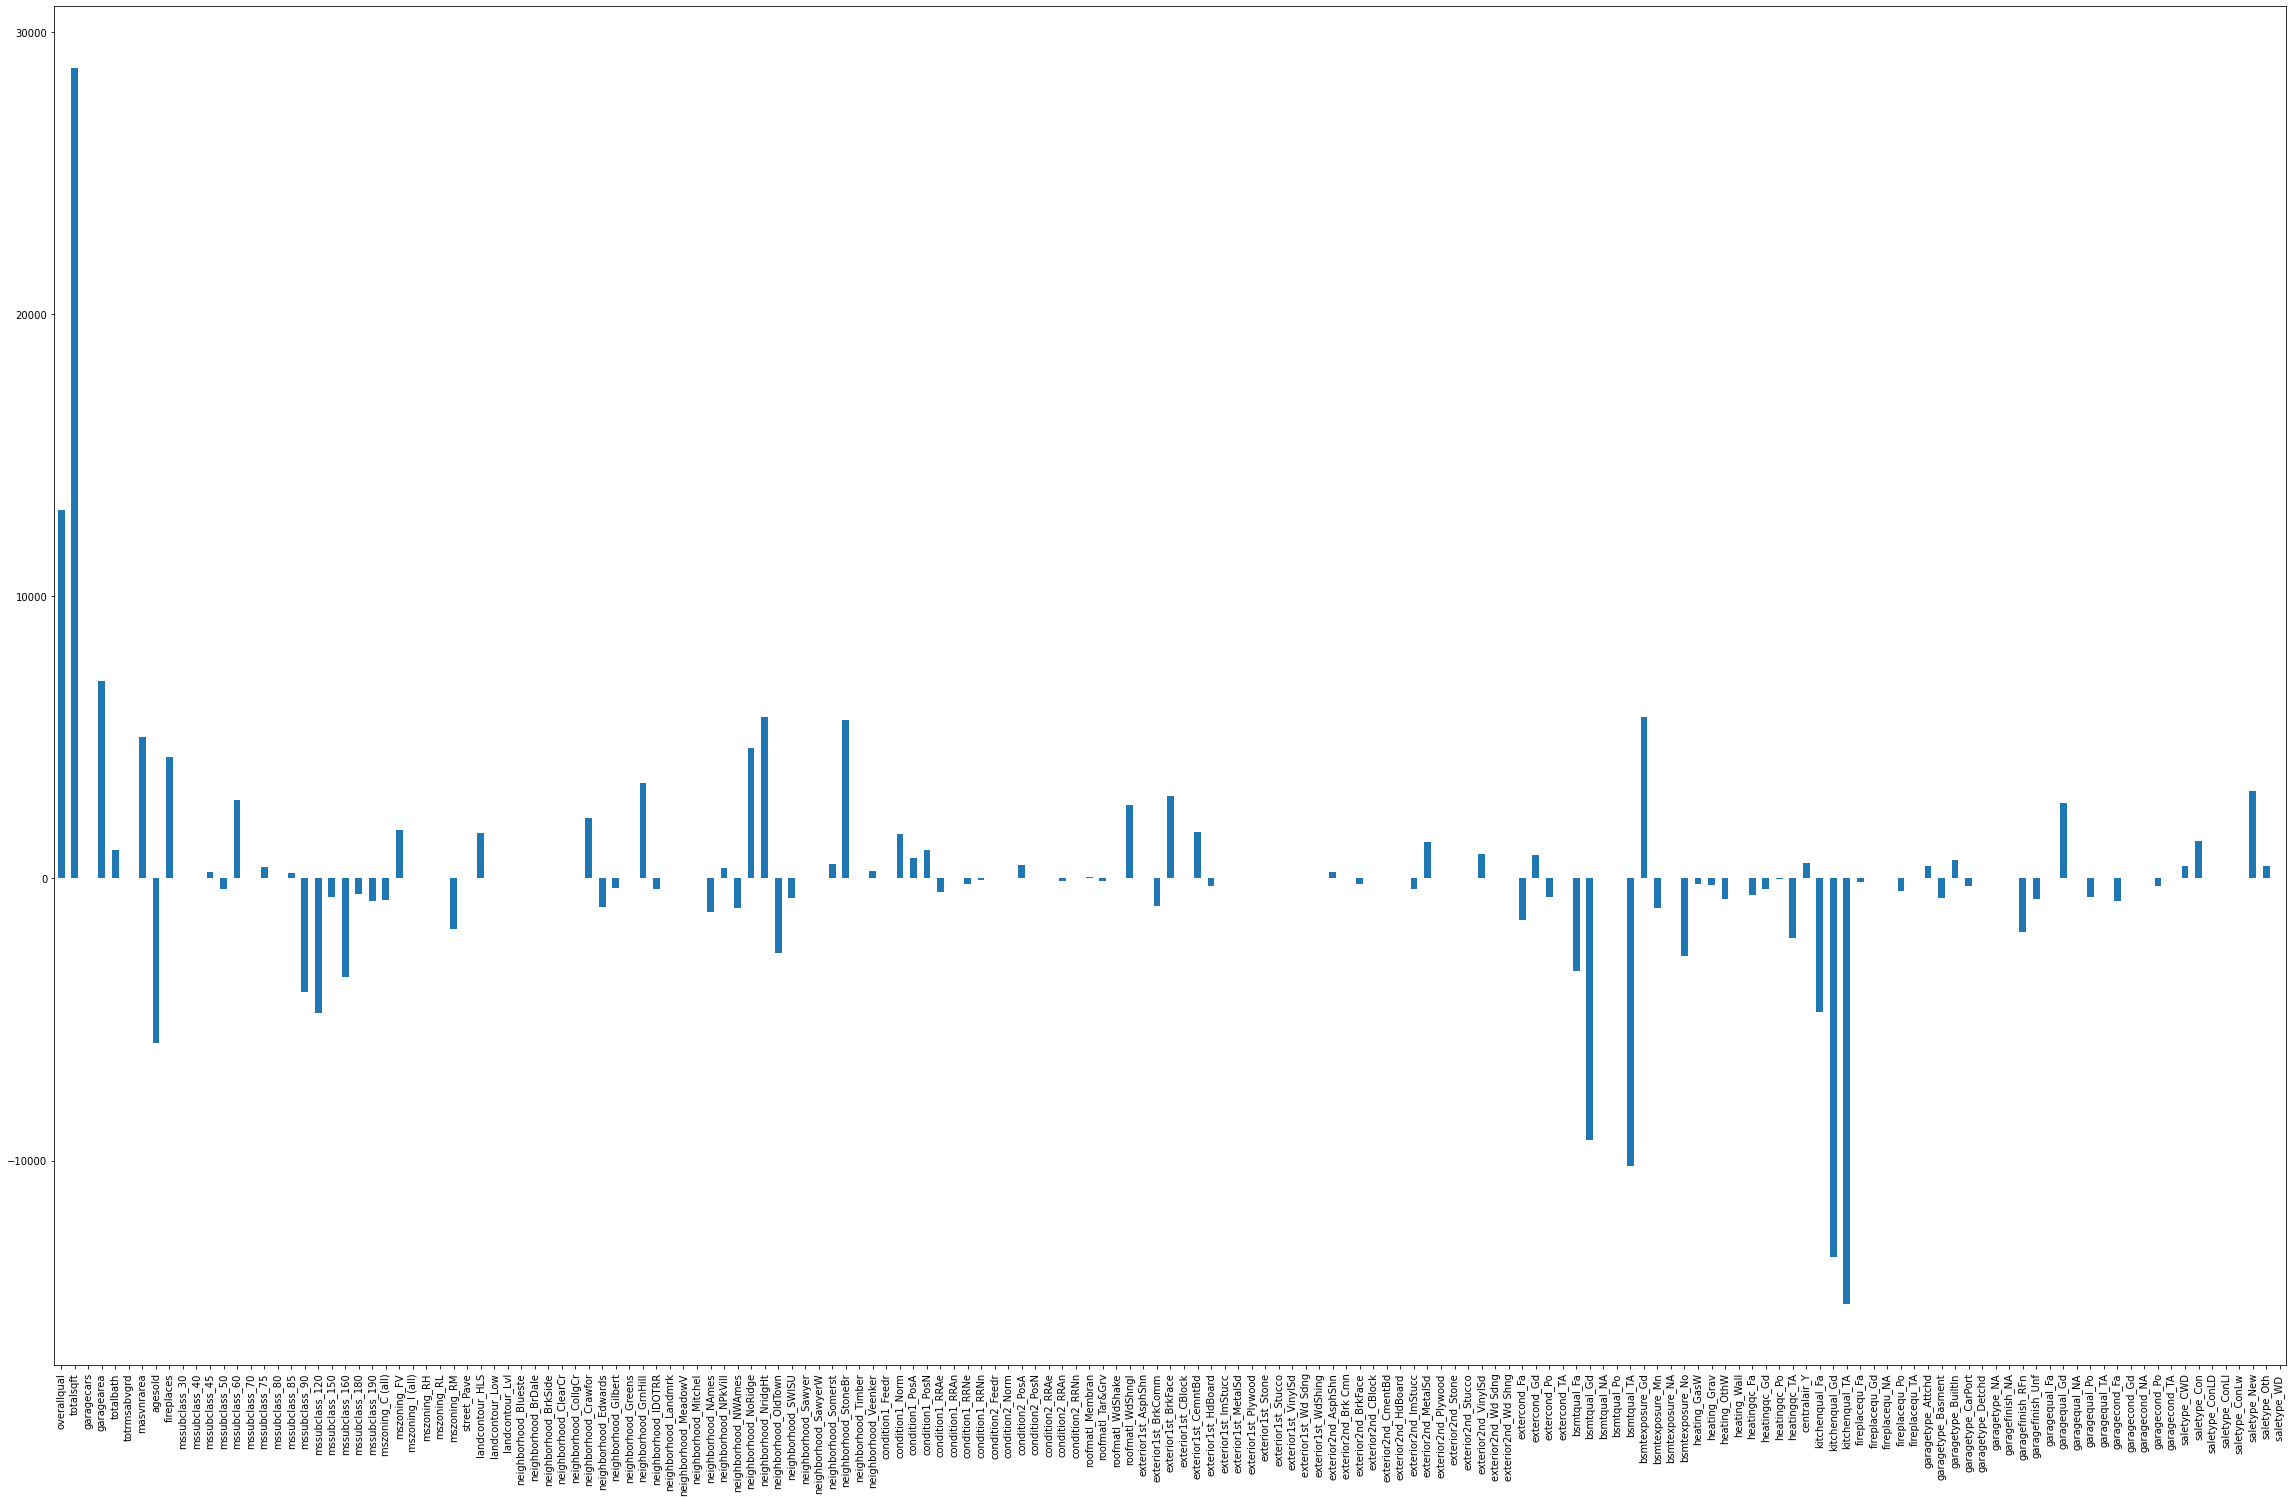

In [58]:
pd.Series(lasso.coef_, index=X.columns).plot.bar(figsize=(40,25));  

Ridge regression adds a penalty to the coefficients to reduce collinearity amongst features. This would help in improving the generalization of the model which would give better estimates or predictions on unseen data. Ridge regression unlike lasso, introduces an L2 penalty (the amount of penalty can be tuned using alpha) would shrink all coefficients by the same factor (so none are eliminated), whereas in lasso, it uses an L1 penalty to penalize the coefficients which may result in the elimination of some features. 

I would say that lasso in this case is a slightly better model in predicting the sale price because its estimated rmse is slightly lower than the ridge model. This might be because lasso penalizes the coefficients which may result in the elimination of some features, the model would then be less complex. Considering there were a lot of features fitted to the model, eliminating some features might have allowed the model to be more generalized and less complex which decreases may cause the decrease in variance explaining the decrease in estimated rmse as well. This in turn resulted in a higher rmse on the trained features, but this is expected due to the bias-variance trade off.

In [59]:
# decided not to do polynomial since there were already a lot of features.

##### Recursive Feature Selection (RFE)

In [60]:
# Lets try RFE (recursive feature selection) and try modelling again to see if we can have a better estimate.
from sklearn.feature_selection import RFE

In [61]:
rfe_lr = RFE(estimator=lr, n_features_to_select=30)

In [62]:
rfe_lr.fit_transform(X_scaled,y)

array([[-0.07622275, -0.44939088,  0.01095903, ..., -0.06260709,
         0.31316248, -0.28905653],
       [ 0.6272926 ,  0.63434583,  0.40229181, ..., -0.06260709,
         0.31316248, -0.28905653],
       [-0.77973809, -0.56676309, -1.05588868, ..., -0.06260709,
         0.31316248, -0.28905653],
       ...,
       [-0.07622275,  0.33961118, -0.60865121, ..., -0.06260709,
        -3.19323054, -0.28905653],
       [-1.48325343, -0.1937803 , -0.83226994, ..., -0.06260709,
         0.31316248, -0.28905653],
       [ 0.6272926 ,  0.32526569, -0.14277885, ..., -0.06260709,
         0.31316248, -0.28905653]])

In [63]:
rfe_lr.get_support(indices=True)

array([  0,   1,   3,   6,   7,   8,  18,  19,  43,  51,  52,  58,  84,
        98, 112, 113, 116, 117, 130, 131, 132, 147, 148, 150, 151, 152,
       153, 155, 156, 162])

In [64]:
X.iloc[:,[0,1,3,6,7,8,18,19,43,51,52,58,84,98,112,113,116,117,130,131,132,147,148,150,151,152,153,155,156,162]].columns
#Selected features of rfe_lr

Index(['overallqual', 'totalsqft', 'garagearea', 'masvnrarea', 'agesold', 'fireplaces', 'mssubclass_90', 'mssubclass_120', 'neighborhood_GrnHill', 'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_StoneBr', 'exterior1st_CemntBd', 'exterior2nd_CmentBd', 'bsmtqual_Fa', 'bsmtqual_Gd', 'bsmtqual_TA', 'bsmtexposure_Gd', 'kitchenqual_Fa', 'kitchenqual_Gd', 'kitchenqual_TA', 'garagequal_Fa', 'garagequal_Gd', 'garagequal_Po', 'garagequal_TA', 'garagecond_Fa', 'garagecond_Gd', 'garagecond_Po', 'garagecond_TA', 'saletype_New'], dtype='object')

In [65]:
rfe_lr_score = rfe_lr.score(X_scaled, y)

In [66]:
rfe_lr_cv_score = cv_score(rfe_lr, X_scaled, y)

In [67]:
print(f'Training R2(rfe_lr): {rfe_lr_score}')
print(f'Estimate of Test R2(rfe_lr): {rfe_lr_cv_score}')

Training R2(rfe_lr): 0.8998145426063343
Estimate of Test R2(rfe_lr): 0.8868541079929624


In [68]:
rfe_lr_rmse = rmse(rfe_lr, X_scaled, y)

In [69]:
rfe_lr_cv_rmse = cv_rmse(rfe_lr, X_scaled, y)

In [70]:
print(f'Training rmse(rfe_lr): {rfe_lr_rmse}')
print(f'Estimate of Test rmse(rfe_lr): {rfe_lr_cv_rmse}')

Training rmse(rfe_lr): 25092.685584561143
Estimate of Test rmse(rfe_lr): 26646.969510508934


In [71]:
rfe_ridge = RFE(estimator=ridge, n_features_to_select=30)

In [72]:
rfe_ridge.fit_transform(X_scaled,y)

array([[-0.07622275, -0.44939088,  0.01095903, ..., -0.20417603,
         0.3459366 , -0.28905653],
       [ 0.6272926 ,  0.63434583,  0.40229181, ..., -0.20417603,
         0.3459366 , -0.28905653],
       [-0.77973809, -0.56676309, -1.05588868, ..., -0.20417603,
         0.3459366 , -0.28905653],
       ...,
       [-0.07622275,  0.33961118, -0.60865121, ...,  4.89773467,
        -2.8907031 , -0.28905653],
       [-1.48325343, -0.1937803 , -0.83226994, ..., -0.20417603,
         0.3459366 , -0.28905653],
       [ 0.6272926 ,  0.32526569, -0.14277885, ..., -0.20417603,
         0.3459366 , -0.28905653]])

In [73]:
rfe_ridge.get_support(indices=True)

array([  0,   1,   3,   6,   7,   8,  13,  18,  19,  39,  43,  51,  52,
        58,  84,  98, 112, 113, 116, 117, 130, 131, 132, 135, 138, 140,
       142, 147, 151, 162])

In [74]:
X.iloc[:,[0,1,3,6,7,8,13,18,19,39,43,51,52,58,84,98,112,113,116,117,130,131,132,135,138,140,142,147,151,162]].columns
#Selected features of rfe_ridge

Index(['overallqual', 'totalsqft', 'garagearea', 'masvnrarea', 'agesold', 'fireplaces', 'mssubclass_60', 'mssubclass_90', 'mssubclass_120', 'neighborhood_Crawfor', 'neighborhood_GrnHill', 'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_StoneBr', 'exterior1st_CemntBd', 'exterior2nd_CmentBd', 'bsmtqual_Fa', 'bsmtqual_Gd', 'bsmtqual_TA', 'bsmtexposure_Gd', 'kitchenqual_Fa', 'kitchenqual_Gd', 'kitchenqual_TA', 'fireplacequ_NA', 'garagetype_Attchd', 'garagetype_BuiltIn', 'garagetype_Detchd', 'garagequal_Fa', 'garagequal_TA', 'saletype_New'], dtype='object')

In [75]:
rfe_ridge_score = rfe_ridge.score(X_scaled, y)

In [76]:
rfe_ridge_cv_score = cv_score(rfe_ridge, X_scaled, y)

In [77]:
print(f'Training R2(rfe_ridge): {rfe_ridge_score}')
print(f'Estimate of Test R2(rfe_ridge): {rfe_ridge_cv_score}')

Training R2(rfe_ridge): 0.9029161502061729
Estimate of Test R2(rfe_ridge): 0.8926834244162167


In [78]:
rfe_ridge_rmse = rmse(rfe_ridge, X_scaled, y)

In [79]:
rfe_ridge_cv_rmse = cv_rmse(rfe_ridge, X_scaled, y)

In [80]:
print(f'Training rmse(rfe_ridge): {rfe_ridge_rmse}')
print(f'Estimate of Test rmse(rfe_ridge): {rfe_ridge_cv_rmse}')

Training rmse(rfe_ridge): 24701.213933066207
Estimate of Test rmse(rfe_ridge): 25966.477752692128


In [81]:
rfe_lasso = RFE(estimator=lasso, n_features_to_select=30)

In [82]:
rfe_lasso.fit_transform(X_scaled,y)

array([[-0.07622275, -0.44939088,  0.01095903, ..., -1.02220848,
        -0.09414154, -0.28905653],
       [ 0.6272926 ,  0.63434583,  0.40229181, ..., -1.02220848,
        -0.09414154, -0.28905653],
       [-0.77973809, -0.56676309, -1.05588868, ..., -1.02220848,
        -0.09414154, -0.28905653],
       ...,
       [-0.07622275,  0.33961118, -0.60865121, ...,  0.97827402,
        -0.09414154, -0.28905653],
       [-1.48325343, -0.1937803 , -0.83226994, ...,  0.97827402,
        -0.09414154, -0.28905653],
       [ 0.6272926 ,  0.32526569, -0.14277885, ..., -1.02220848,
        -0.09414154, -0.28905653]])

In [83]:
rfe_lasso.get_support(indices=True)

array([  0,   1,   3,   6,   7,   8,  13,  18,  19,  21,  25,  39,  43,
        51,  52,  53,  58,  79,  82, 108, 112, 113, 116, 117, 120, 130,
       131, 132, 148, 162])

In [84]:
X.iloc[:,[0,1,3,6,7,8,13,18,19,21,25,39,43,51,52,53,58,79,82,108,112,113,116,117,120,130,131,132,148,162]].columns
#Selected features of rfe_ridge

Index(['overallqual', 'totalsqft', 'garagearea', 'masvnrarea', 'agesold', 'fireplaces', 'mssubclass_60', 'mssubclass_90', 'mssubclass_120', 'mssubclass_160', 'mszoning_FV', 'neighborhood_Crawfor', 'neighborhood_GrnHill', 'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown', 'neighborhood_StoneBr', 'roofmatl_WdShngl', 'exterior1st_BrkFace', 'extercond_Fa', 'bsmtqual_Fa', 'bsmtqual_Gd', 'bsmtqual_TA', 'bsmtexposure_Gd', 'bsmtexposure_No', 'kitchenqual_Fa', 'kitchenqual_Gd', 'kitchenqual_TA', 'garagequal_Gd', 'saletype_New'], dtype='object')

In [85]:
rfe_lasso_score = rfe_lasso.score(X_scaled, y)

In [86]:
rfe_lasso_cv_score = cv_score(rfe_lasso, X_scaled, y)

In [87]:
print(f'Training R2(rfe_lasso): {rfe_lasso_score}')
print(f'Estimate of Test R2(rfe_lasso): {rfe_lasso_cv_score}')

Training R2(rfe_lasso): 0.9075787222148658
Estimate of Test R2(rfe_lasso): 0.8986703883596793


In [88]:
rfe_lasso_rmse = rmse(rfe_lasso, X_scaled, y)

In [89]:
rfe_lasso_cv_rmse = cv_rmse(rfe_lasso, X_scaled, y)

In [90]:
print(f'Training rmse(rfe_lasso): {rfe_lasso_rmse}')
print(f'Estimate of Test rmse(rfe_lasso): {rfe_lasso_cv_rmse}')

Training rmse(rfe_lasso): 24100.762695967896
Estimate of Test rmse(rfe_lasso): 25249.317658771393


For the first RFE selection of 30 features, it seems to perform slightly worse for lasso and ridge, however for linear regression, it is doing better with RFE.

In [91]:
#how about rfe with default feature selection which would select half of the features

rfe2_lr = RFE(estimator=lr)

In [92]:
rfe2_lr.fit_transform(X_scaled,y)

array([[-0.07622275, -0.44939088,  0.01095903, ..., -0.04422658,
        -0.28905653,  0.38791399],
       [ 0.6272926 ,  0.63434583,  0.40229181, ..., -0.04422658,
        -0.28905653,  0.38791399],
       [-0.77973809, -0.56676309, -1.05588868, ..., -0.04422658,
        -0.28905653,  0.38791399],
       ...,
       [-0.07622275,  0.33961118, -0.60865121, ..., -0.04422658,
        -0.28905653,  0.38791399],
       [-1.48325343, -0.1937803 , -0.83226994, ..., -0.04422658,
        -0.28905653,  0.38791399],
       [ 0.6272926 ,  0.32526569, -0.14277885, ..., -0.04422658,
        -0.28905653,  0.38791399]])

In [93]:
rfe2_lr.get_support(indices=True)

array([  0,   1,   3,   4,   6,   7,   8,  13,  18,  19,  21,  25,  27,
        28,  29,  31,  39,  40,  43,  48,  49,  50,  51,  52,  53,  54,
        58,  62,  63,  64,  79,  81,  82,  84,  85,  87,  88,  91,  92,
        98,  99, 101, 102, 105, 106, 108, 109, 110, 111, 112, 113, 116,
       117, 118, 119, 120, 128, 129, 130, 131, 132, 133, 134, 136, 137,
       138, 140, 142, 143, 145, 147, 148, 150, 151, 152, 153, 155, 156,
       157, 158, 162, 164])

In [94]:
X.iloc[:,[0,1,3,4,6,7,8,13,18,19,21,25,27,28,29,31,39,40,43,48,49,50,51,52,53,54,58,62,63,64,79,81,82,84,85,87,88,91,
          92,98,99,101,102,105,106,108,109,110,111,112,113,116,117,118,119,120,128,129,130,131,132,133,134,136,137,138,
          140,142,143,145,147,148,150,151,152,153,155,156,157,158,162,164]].columns
#Selected features of rfe2_lr

Index(['overallqual', 'totalsqft', 'garagearea', 'totalbath', 'masvnrarea', 'agesold', 'fireplaces', 'mssubclass_60', 'mssubclass_90', 'mssubclass_120', 'mssubclass_160', 'mszoning_FV', 'mszoning_RH', 'mszoning_RL', 'mszoning_RM', 'landcontour_HLS', 'neighborhood_Crawfor', 'neighborhood_Edwards', 'neighborhood_GrnHill', 'neighborhood_NAmes', 'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown', 'neighborhood_SWISU', 'neighborhood_StoneBr', 'condition1_Norm', 'condition1_PosA', 'condition1_PosN', 'roofmatl_WdShngl', 'exterior1st_BrkComm', 'exterior1st_BrkFace', 'exterior1st_CemntBd', 'exterior1st_HdBoard', 'exterior1st_MetalSd', 'exterior1st_Plywood', 'exterior1st_VinylSd', 'exterior1st_Wd Sdng', 'exterior2nd_CmentBd', 'exterior2nd_HdBoard', 'exterior2nd_MetalSd', 'exterior2nd_Plywood', 'exterior2nd_VinylSd', 'exterior2nd_Wd Sdng', 'extercond_Fa', 'extercond_Gd', 'extercond_Po', 'extercond_TA', 'bsmtqual_Fa',
       'bsmtq

In [95]:
rfe2_lr_score = rfe2_lr.score(X_scaled, y)

In [96]:
rfe2_lr_cv_score = cv_score(rfe2_lr, X_scaled, y)

In [97]:
print(f'Training R2(rfe2_lr): {rfe2_lr_score}')
print(f'Estimate of Test R2(rfe2_lr): {rfe2_lr_cv_score}')

Training R2(rfe2_lr): 0.9172620579163314
Estimate of Test R2(rfe2_lr): -5.912706531763156e+24


In [98]:
rfe2_lr_rmse = rmse(rfe2_lr, X_scaled, y)

In [99]:
rfe2_lr_cv_rmse = cv_rmse(rfe2_lr, X_scaled, y)

In [100]:
print(f'Training rmse(rfe2_lr): {rfe2_lr_rmse}')
print(f'Estimate of Test rmse(rfe2_lr): {rfe2_lr_cv_rmse}')

Training rmse(rfe2_lr): 22803.271576228413
Estimate of Test rmse(rfe2_lr): 1.8407980960104954e+17


In [101]:
rfe2_ridge = RFE(estimator=ridge)

In [102]:
rfe2_ridge.fit_transform(X_scaled,y)

array([[-0.07622275, -0.44939088,  0.29408274, ..., -0.04422658,
        -0.28905653,  0.38791399],
       [ 0.6272926 ,  0.63434583,  0.29408274, ..., -0.04422658,
        -0.28905653,  0.38791399],
       [-0.77973809, -0.56676309, -1.01302254, ..., -0.04422658,
        -0.28905653,  0.38791399],
       ...,
       [-0.07622275,  0.33961118,  0.29408274, ..., -0.04422658,
        -0.28905653,  0.38791399],
       [-1.48325343, -0.1937803 , -1.01302254, ..., -0.04422658,
        -0.28905653,  0.38791399],
       [ 0.6272926 ,  0.32526569,  0.29408274, ..., -0.04422658,
        -0.28905653,  0.38791399]])

In [103]:
rfe2_ridge.get_support(indices=True)

array([  0,   1,   2,   3,   4,   6,   7,   8,  13,  18,  19,  20,  21,
        22,  23,  25,  27,  28,  31,  39,  40,  43,  44,  48,  49,  50,
        51,  52,  53,  54,  57,  58,  62,  63,  64,  79,  81,  82,  84,
        85,  87,  88,  91,  92,  98,  99, 101, 102, 105, 106, 108, 109,
       110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 123, 128, 129,
       130, 131, 132, 135, 138, 140, 142, 144, 145, 147, 150, 151, 156,
       157, 158, 162, 164])

In [104]:
X.iloc[:,[0,1,2,3,4,6,7,8,13,18,19,20,21,22,23,25,27,28,31,39,40,43,44,48,49,50,51,52,53,54,57,58,62,63,64,79,81,82,84,
          85,87,88,91,92,98,99,101,102,105,106,108,109,110,111,112,113,114,116,117,118,119,120,123,128,129,130,131,132,
          135,138,140,142,144,145,147,150,151,156,157,158,162,164]].columns
#Selected features of rfe2_ridge

Index(['overallqual', 'totalsqft', 'garagecars', 'garagearea', 'totalbath', 'masvnrarea', 'agesold', 'fireplaces', 'mssubclass_60', 'mssubclass_90', 'mssubclass_120', 'mssubclass_150', 'mssubclass_160', 'mssubclass_180', 'mssubclass_190', 'mszoning_FV', 'mszoning_RH', 'mszoning_RL', 'landcontour_HLS', 'neighborhood_Crawfor', 'neighborhood_Edwards', 'neighborhood_GrnHill', 'neighborhood_IDOTRR', 'neighborhood_NAmes', 'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown', 'neighborhood_SWISU', 'neighborhood_Somerst', 'neighborhood_StoneBr', 'condition1_Norm', 'condition1_PosA', 'condition1_PosN', 'roofmatl_WdShngl', 'exterior1st_BrkComm', 'exterior1st_BrkFace', 'exterior1st_CemntBd', 'exterior1st_HdBoard', 'exterior1st_MetalSd', 'exterior1st_Plywood', 'exterior1st_VinylSd', 'exterior1st_Wd Sdng', 'exterior2nd_CmentBd', 'exterior2nd_HdBoard', 'exterior2nd_MetalSd', 'exterior2nd_Plywood', 'exterior2nd_VinylSd',
       'exterio

In [105]:
rfe2_ridge_score = rfe2_ridge.score(X_scaled, y)

In [106]:
rfe2_ridge_cv_score = cv_score(rfe2_ridge, X_scaled, y)

In [107]:
print(f'Training R2(rfe2_ridge): {rfe2_ridge_score}')
print(f'Estimate of Test R2(rfe2_ridge): {rfe2_ridge_cv_score}')

Training R2(rfe2_ridge): 0.9173446782577576
Estimate of Test R2(rfe2_ridge): 0.8990955164519299


In [108]:
rfe2_ridge_rmse = rmse(rfe2_ridge, X_scaled, y)

In [109]:
rfe2_ridge_cv_rmse = cv_rmse(rfe2_ridge, X_scaled, y)

In [110]:
print(f'Training rmse(rfe2_ridge): {rfe2_ridge_rmse}')
print(f'Estimate of Test rmse(rfe2_ridge): {rfe2_ridge_cv_rmse}')

Training rmse(rfe2_ridge): 22791.883302572856
Estimate of Test rmse(rfe2_ridge): 25181.96162779544


In [111]:
rfe2_lasso = RFE(estimator=lasso)

In [112]:
rfe2_lasso.fit_transform(X_scaled,y)

array([[-0.07622275, -0.44939088,  0.01095903, ..., -0.04422658,
        -0.28905653, -0.04422658],
       [ 0.6272926 ,  0.63434583,  0.40229181, ..., -0.04422658,
        -0.28905653, -0.04422658],
       [-0.77973809, -0.56676309, -1.05588868, ..., -0.04422658,
        -0.28905653, -0.04422658],
       ...,
       [-0.07622275,  0.33961118, -0.60865121, ..., -0.04422658,
        -0.28905653, -0.04422658],
       [-1.48325343, -0.1937803 , -0.83226994, ..., -0.04422658,
        -0.28905653, -0.04422658],
       [ 0.6272926 ,  0.32526569, -0.14277885, ..., -0.04422658,
        -0.28905653, -0.04422658]])

In [112]:
rfe2_lasso.get_support(indices=True)

array([  0,   1,   3,   4,   6,   7,   8,  12,  13,  15,  18,  19,  20,
        21,  22,  23,  24,  25,  29,  31,  39,  40,  41,  43,  44,  48,
        49,  50,  51,  52,  53,  54,  57,  58,  60,  62,  63,  64,  65,
        71,  79,  81,  82,  84,  85,  94, 100, 101, 105, 108, 109, 110,
       112, 113, 116, 117, 118, 120, 122, 123, 125, 126, 128, 129, 130,
       131, 132, 136, 138, 139, 140, 141, 145, 146, 148, 150, 152, 155,
       157, 158, 162, 163])

In [115]:
features_rfe2_lasso = X.iloc[:,[0,1,3,4,6,7,8,12,13,15,18,19,20,21,22,23,24,25,29,31,39,40,41,43,44,48,49,50,51,52,53,54,57,58,60,62,63,64,65,
          71,79,81,82,84,85,94,100,101,105,108,109,110,112,113,116,117,118,120,122,123,125,126,129,130,131,132,136,138,
          139,140,141,145,146,148,150,152,155,157,158,162,163]].columns
#Selected features of rfe2_lasso

In [116]:
len(features_rfe2_lasso)

81

In [117]:
features_rfe2_lasso

Index(['overallqual', 'totalsqft', 'garagearea', 'totalbath', 'masvnrarea', 'agesold', 'fireplaces', 'mssubclass_50', 'mssubclass_60', 'mssubclass_75', 'mssubclass_90', 'mssubclass_120', 'mssubclass_150', 'mssubclass_160', 'mssubclass_180', 'mssubclass_190', 'mszoning_C (all)', 'mszoning_FV', 'mszoning_RM', 'landcontour_HLS', 'neighborhood_Crawfor', 'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_GrnHill', 'neighborhood_IDOTRR', 'neighborhood_NAmes', 'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown', 'neighborhood_SWISU', 'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Veenker', 'condition1_Norm', 'condition1_PosA', 'condition1_PosN', 'condition1_RRAe', 'condition2_PosA', 'roofmatl_WdShngl', 'exterior1st_BrkComm', 'exterior1st_BrkFace', 'exterior1st_CemntBd', 'exterior1st_HdBoard', 'exterior2nd_AsphShn', 'exterior2nd_ImStucc', 'exterior2nd_MetalSd', 'exterior2nd_VinylSd', 'extercond_Fa',
   

In [114]:
rfe2_lasso_score = rfe2_lasso.score(X_scaled, y)

In [115]:
rfe2_lasso_cv_score = cv_score(rfe2_lasso, X_scaled, y)

In [116]:
print(f'Training R2(rfe2_lasso): {rfe2_lasso_score}')
print(f'Estimate of Test R2(rfe2_lasso): {rfe2_lasso_cv_score}')

Training R2(rfe2_lasso): 0.9150216567104958
Estimate of Test R2(rfe2_lasso): 0.9015392886529584


In [117]:
rfe2_lasso_rmse = rmse(rfe2_lasso, X_scaled, y)

In [118]:
rfe2_lasso_cv_rmse = cv_rmse(rfe2_lasso, X_scaled, y)

In [119]:
print(f'Training rmse(rfe2_lasso): {rfe2_lasso_rmse}')
print(f'Estimate of Test rmse(rfe2_lasso): {rfe2_lasso_cv_rmse}')

Training rmse(rfe2_lasso): 23109.94608085917
Estimate of Test rmse(rfe2_lasso): 24885.916179059277


With the second RFE selection of half of the original features selected, this set of features does better on ridge and lasso but did badly only linear regression which is similar to the original set of features selected. 

Based on the evaluation of the models, I can tell that rfe2_lasso model seems to be performing at optimal bias-variance trade off with the lowest estimated RMSE. Lets now do another valuation using train/test split to evaluate the results of rfe2_lasso.

In [135]:
train_X, test_X, y_train, y_test = train_test_split(X, y, random_state=42) #using the default test size of 0.25

In [137]:
print(train_X.shape)
print(test_X.shape)

(1536, 165)
(513, 165)


In [138]:
#scale the data
train_X_scaled = ss.fit_transform(train_X)
test_X_scaled = ss.transform(test_X)

In [140]:
rfe2_lasso.fit(train_X_scaled, y_train)

RFE(estimator=Lasso(alpha=325.84))

In [142]:
rfe2_lasso_train_score = rfe2_lasso.score(train_X_scaled, y_train)

In [143]:
rfe2_lasso_test_score = rfe2_lasso.score(test_X_scaled, y_test)

In [144]:
print(f'Training R2(rfe2_lasso): {rfe2_lasso_train_score}')
print(f'Test R2(rfe2_lasso): {rfe2_lasso_test_score}')

Training R2(rfe2_lasso): 0.9138182797543549
Test R2(rfe2_lasso): 0.9116641660073073


In [145]:
rfe2_lasso_train_rmse = rmse(rfe2_lasso, train_X_scaled, y_train)

In [146]:
rfe2_lasso_test_rmse = rmse(rfe2_lasso, test_X_scaled, y_test)

In [147]:
print(f'Training rmse(rfe2_lasso): {rfe2_lasso_train_rmse}')
print(f'Test rmse(rfe2_lasso): {rfe2_lasso_test_rmse}')

Training rmse(rfe2_lasso): 23249.89741034426
Test rmse(rfe2_lasso): 23631.95426561298


In [152]:
y_preds = rfe2_lasso.predict(test_X)

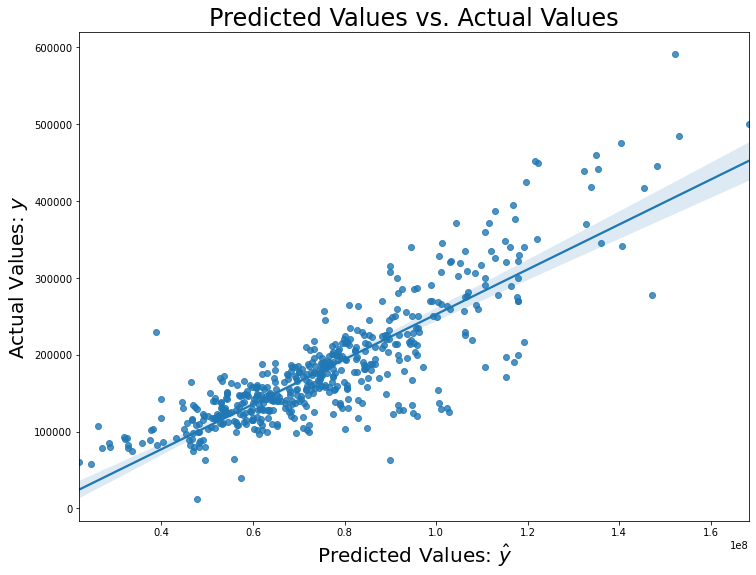

In [153]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
sns.regplot(y_preds, y_test)

# Plot a line.
#plt.plot([0, np.max(y_preds)],
#         [0, np.max(y)],
#         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

#this is just to show the linearity of assumption.

Evaluating base on the train-test split method, we can see that rfe2_lasso model does perform similarly well. The predicted sale price and the actual sale price follow a very linear relation which matches our evaluation and how the model would perform on unseen data.

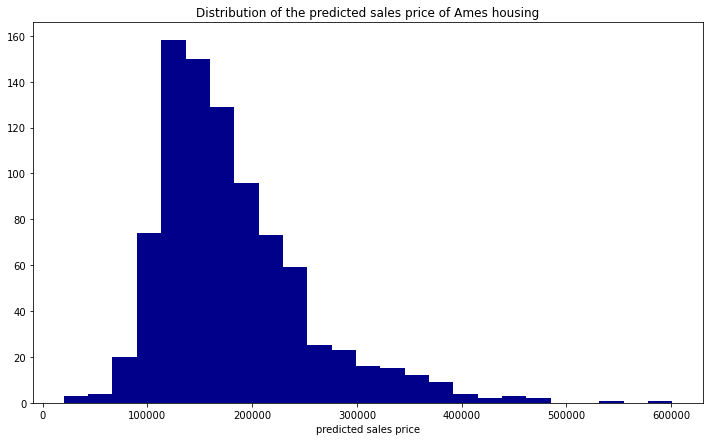

In [201]:
plt.figure(figsize=(12,7))
plt.hist(y_preds,bins=25,histtype='bar',color='darkblue')
plt.xlabel("predicted sales price")
plt.title("Distribution of the predicted sales price of Ames housing")

plt.show();

The distribution falls in a similar range to the actual sales price and also follows a right skewed distribution. This would be most likely the case as we expect the sale price for houses to be within this range.

## Conclusion and Recommendation

In [126]:
evaluation_data = {'LR':['0.919','-7.251','22,445.324','2.088'], 'Ridge':['0.919','0.898','22,524.697','25,255.187'],
                  'Lasso':['0.915','0.901','23,087.294','24,886.470'], 'RFE_LR':['0.899','0.886','25,092.685','26,646.969'],
                  'RFE2_LR':['0.917','-5.912','22,803.271','1.840'], 'RFE_Ridge': ['0.902','0.892','24,701.213','25,966.477'],
                    'RFE2_Ridge':['0.917','0.899','22,791.883','25,181.961'], 'RFE_Lasso':['0.907','0.898','24,100.762','25,249.317'],
                   'RFE2_Lasso':['0.915','0.901','23,109.946','24,885.916']}

In [127]:
evaluation_df = pd.DataFrame(evaluation_data, index=['R2','R2 Test Est', 'RMSE', 'RMSE Test Est'])

In [128]:
evaluation_df

,LR,Ridge,Lasso,RFE_LR,RFE2_LR,RFE_Ridge,RFE2_Ridge,RFE_Lasso,RFE2_Lasso
R2,0.919,0.919,0.915,0.899,0.917,0.902,0.917,0.907,0.915
R2 Test Est,-7.251,0.898,0.901,0.886,-5.912,0.892,0.899,0.898,0.901
RMSE,"22,445.324","22,524.697","23,087.294","25,092.685","22,803.271","24,701.213","22,791.883","24,100.762","23,109.946"
RMSE Test Est,2.088,"25,255.187","24,886.470","26,646.969",1.840,"25,966.477","25,181.961","25,249.317","24,885.916"


I have selected the RFE2_Lasso which uses half of my initial selected features, which is 81 features, to be the best model as the RMSE Test Est is the lowest, which is a sign that it would give the least variance on unseen data. Although the RMSE on training data was not the lowest, it is understandable as we want the model to be more generalized and therefore would decrease in accuracy for training data which causes a slight increase in RMSE for training data, however, the RMSE for training data is not too high in comparison as seen in the table above. The accuracy(R2 score) is equally high for both the training and test estimate, which explains why the RMSE is also low in comparison to the other model and lowest for the Test Est amongst all models.

## Submission for Sale Price prediction

In [155]:
#We will now use our chosen model on our unseen data to predict for actual submission
y_preds = rfe2_lasso.predict(test_features_scaled)
y_preds

array([115218.15749347, 206152.15945933, 193210.5535858 , 114740.96842824,
       180570.36322662,  99841.26246781, 104200.25941731, 153341.63239447,
       193778.71695987, 165516.62825422, 162190.48020829, 134104.41630662,
       165119.98978585, 280956.14175624, 125686.37023724, 131543.26465654,
       173536.51860144, 121543.42998125, 185129.78739782, 175402.69815713,
       150501.20930187, 120278.06209513, 199922.86510824, 177895.3840083 ,
       179575.96582242, 115508.57162934, 148130.52005938, 144885.41710383,
       164740.35290292,  44151.09445192, 107317.48823472, 105788.71311156,
       219987.28291701, 153625.27914839, 213486.45884736, 180636.31815526,
       124005.10579387,  95084.515203  ,  99929.3841623 , 209310.95705461,
       180291.84313101, 197821.20923414, 156390.11561021, 155975.47480782,
       228395.4287637 , 116747.71810312, 204252.61402113, 114415.26588352,
       126748.34160051, 115489.81021356, 101830.23091321, 185631.03558937,
       245118.23458833, 1

In [163]:
#create df for submission 2 (rfe2_lasso)
submission_2 = pd.DataFrame(y_preds, columns=['Saleprice']) 
submission_2['Id'] = test_df['Id']
submission_2.head(2)

,Saleprice,Id
0,115218.157493,2658
1,206152.159459,2718


In [176]:
#reorganize columns
submission_2 = submission_2[['Id','Saleprice']]
submission_2.head(2)

,Id,Saleprice
0,2658,115218.157493
1,2718,206152.159459


In [182]:
submission_2.to_csv('datasets/submission2.csv',index=False)